<h4> Loading data and cleaning them

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import fredapi
from sklearn.impute import KNNImputer
from dotenv import load_dotenv
import os
import seaborn as sns

load_dotenv()
df_company = yf.download('NVDA','2019-01-01')
df_company = df_company.reset_index().rename(columns={"index": "Date"})
df_company_temp = df_company.copy()
df_company_temp.columns = df_company.columns.droplevel(1)
df_company = df_company_temp
API_KEY = os.getenv('API_KEY')
fred = fredapi.Fred(api_key=API_KEY)


gdp_data = fred.get_series("GDP")
cpi_data = fred.get_series("CPIAUCSL")
unemployment_data = fred.get_series("UNRATE")
fed_funds_data = fred.get_series("FEDFUNDS")
sp500_data = fred.get_series("SP500")
vix_data = fred.get_series("VIXCLS")

df_economic = pd.DataFrame({
    "SP500": sp500_data,
    "VIX": vix_data,
    "GDP": gdp_data,
    "CPI": cpi_data,
    "UR": unemployment_data,
    "FF": fed_funds_data})
df_economic = df_economic.reset_index().rename(columns={"index": "Date"})
df_economic = df_economic[df_economic['Date'] > '2019-01-01']
df_merged = df_merged = pd.merge(df_company, df_economic, on='Date', how='left')
numeric_data = df_merged.drop(columns=['Date']) 
imputer = KNNImputer(n_neighbors=2)
df_merged_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)
df_merged_imputed['Date'] = df_merged['Date'].reset_index(drop=True)
df_merged = df_merged_imputed

[*********************100%***********************]  1 of 1 completed


In [11]:
df_merged.head(10)

,Close,High,Low,Open,Volume,SP500,VIX,GDP,CPI,UR,FF
0,3.377780,3.433820,3.224785,3.239415,508752000.0,2510.03,23.22,23937.2790,274.2895,5.75,0.210
1,3.173704,3.351495,3.166265,3.317523,705552000.0,2447.89,25.45,20826.3075,278.6390,3.65,3.485
2,3.377035,3.415222,3.216106,3.246854,585620000.0,2531.94,21.38,24170.3890,299.1280,3.55,3.370
3,3.555818,3.592765,3.382986,3.434315,709160000.0,2549.69,21.40,20826.3075,278.6390,3.65,3.485
4,3.467294,3.639630,3.394640,3.637398,786016000.0,2574.41,20.47,20826.3075,278.6390,3.65,3.485
5,3.535485,3.582847,3.468039,3.518623,617260000.0,2584.96,19.98,23103.7275,278.7090,3.70,3.740
6,3.601196,3.609875,3.455641,3.516144,523156000.0,2596.64,19.50,23937.2790,287.2250,5.55,2.710
7,3.690464,3.713277,3.551107,3.578879,874764000.0,2596.26,18.19,20826.3075,278.6390,3.65,3.485
8,3.730385,3.755678,3.614586,3.638142,730168000.0,2582.61,19.07,20826.3075,278.6390,3.65,3.485
9,3.716252,3.802544,3.697902,3.763117,617012000.0,2610.30,18.60,23103.7275,278.7090,3.70,3.740


In [4]:
df_merged.describe()

,Close,High,Low,Open,Volume,SP500,VIX,GDP,CPI,UR,FF
count,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,35.726628,36.406321,34.998770,35.746823,4.434531e+08,4093.947317,20.341656,24352.808927,283.738287,4.978787,2.434509
std,40.240310,41.039751,39.422621,40.331576,1.966942e+08,913.160787,7.847257,2545.973950,14.464656,1.926287,1.504017
min,3.173704,3.351495,3.166265,3.239415,9.788400e+07,2237.400000,11.540000,19935.444000,253.319000,3.500000,0.050000
25%,10.307368,10.486169,10.137169,10.341073,3.027261e+08,3307.410000,14.992500,21808.884000,274.129500,3.700000,1.230000
50%,18.219628,18.733477,17.816141,18.120621,4.124900e+08,4115.725000,18.490000,23937.279000,282.888500,4.100000,2.460000
75%,43.879257,44.559924,43.260446,43.971216,5.424215e+08,4556.210000,23.325000,26544.254000,295.195500,5.400000,3.440000
max,149.416245,153.115916,147.806407,153.015919,2.511528e+09,6144.150000,82.690000,29719.647000,316.449000,14.800000,5.330000


<h4>Distribution of features: Histograms and distrubition over time.

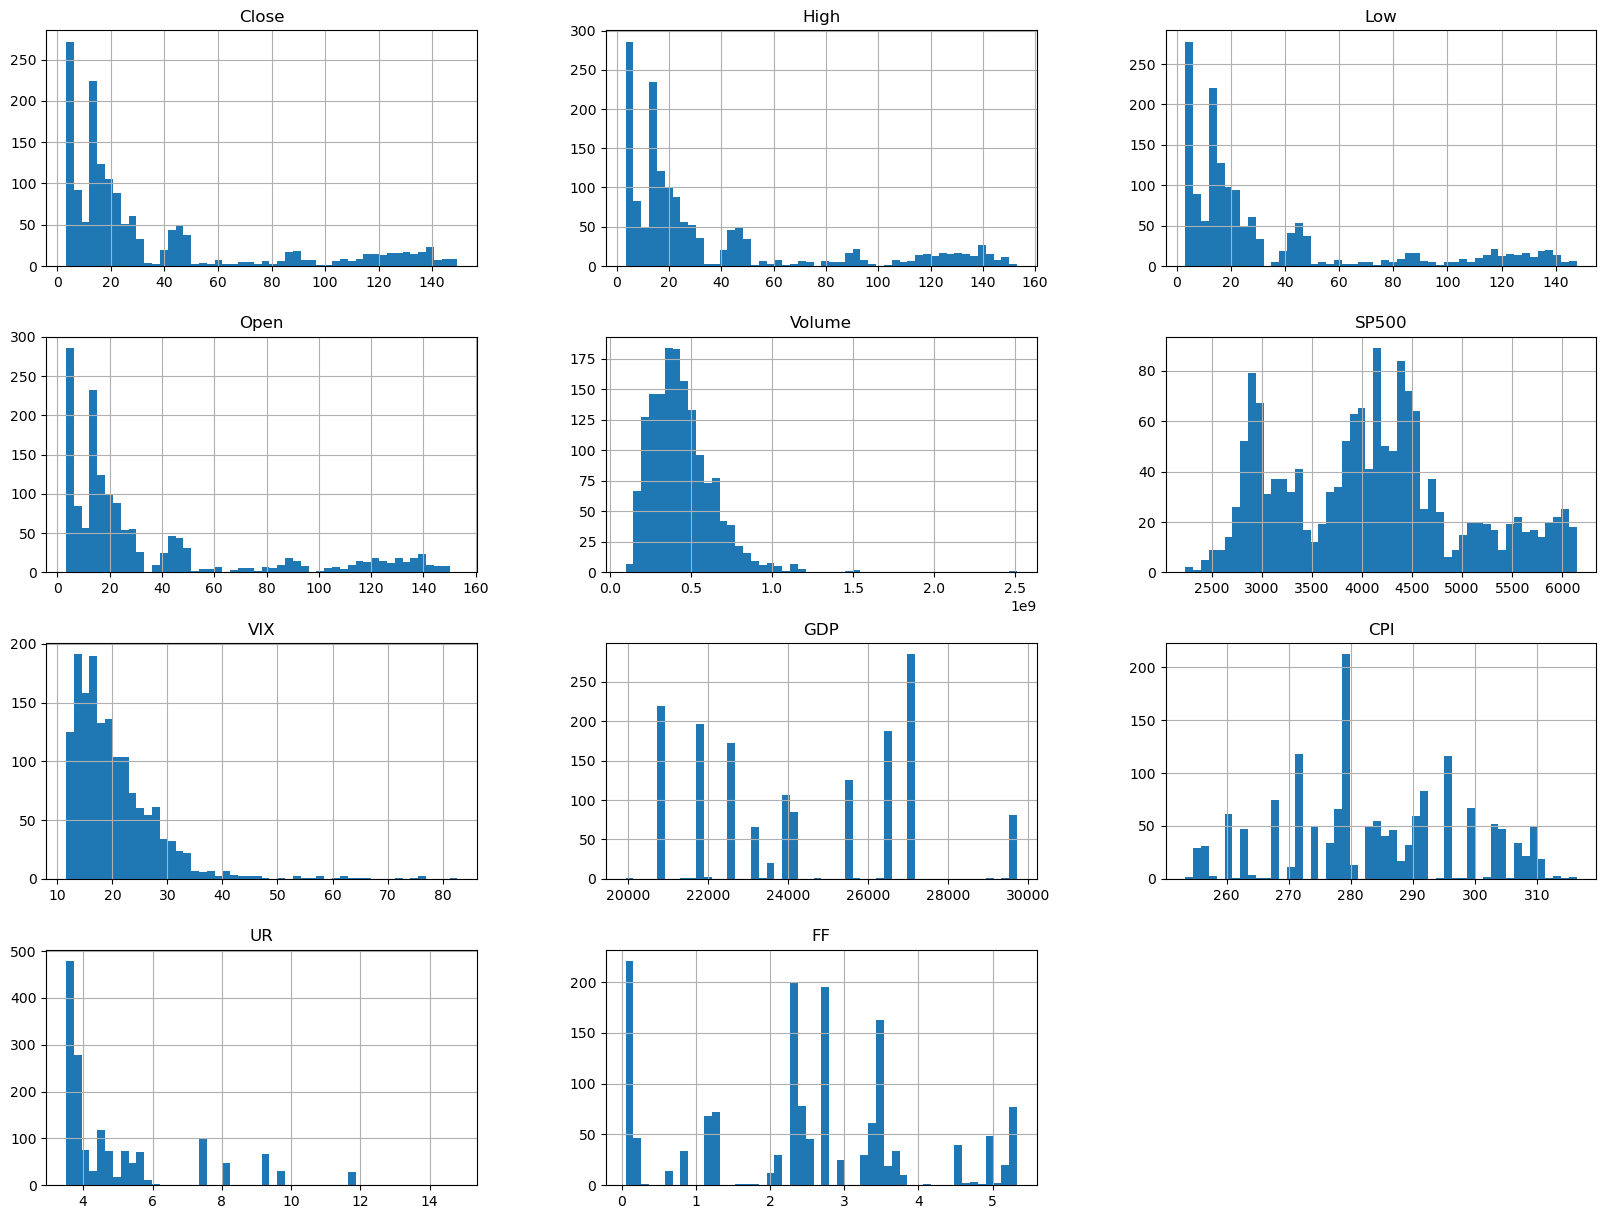

In [5]:
df_merged.hist(bins = 50, figsize = (20,15))
plt.show()

In [40]:
import plotly.express as px
features = ['Close', 'SP500', 'Volume', 'VIX']

for f in features:
    fig = px.line(df_merged, x='Date', y=f, title=f'{f} Over Time')
    fig.update_layout(title=f'{f} Over Time', xaxis_title='Date', yaxis_title=f'{f} Value')
    fig.show()

<h4> We check the correlation heatmap. We can clearly see that there strongly corellated variables.

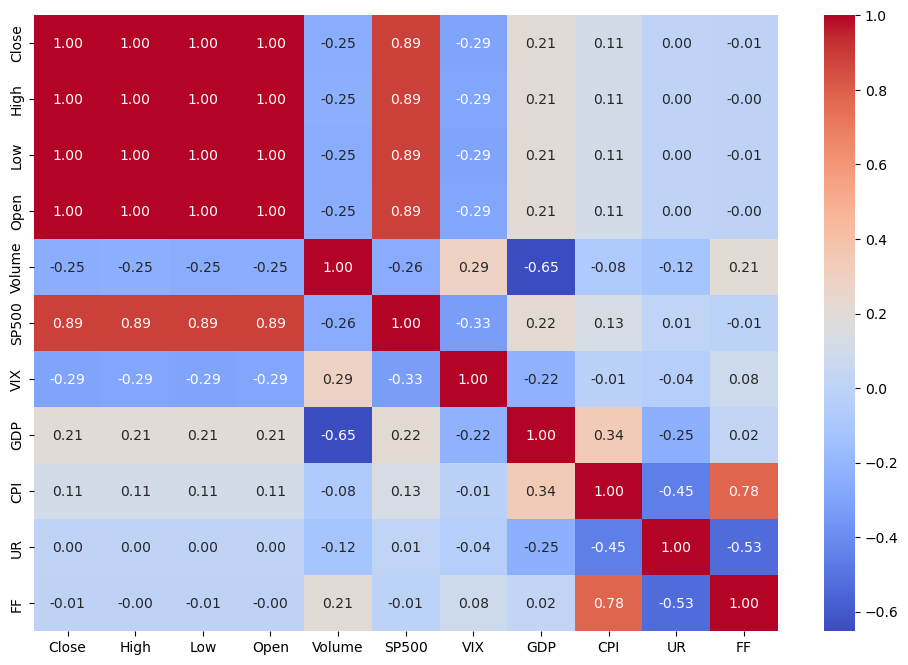

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df_merged.drop(columns='Date').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

<h4> Let's see the correlations (of the 1.00 correlated variables) on the pairplots 

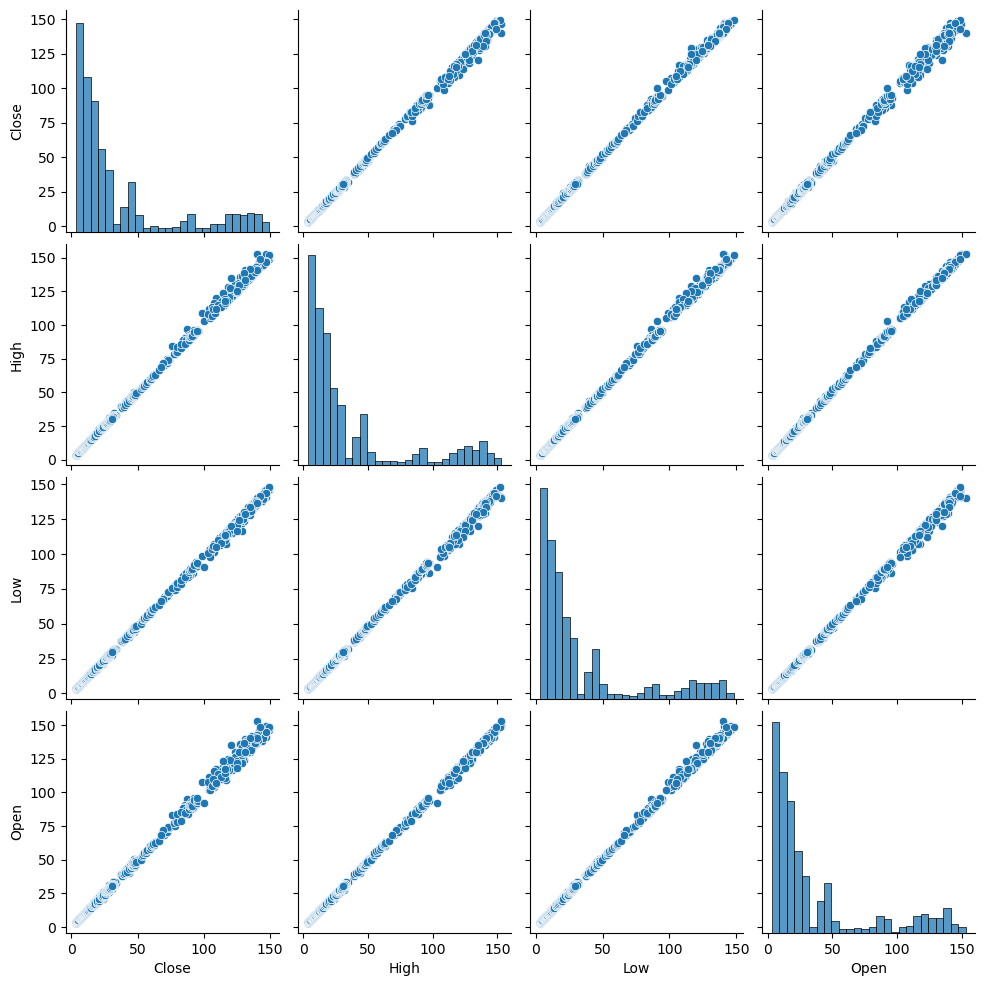

In [32]:
sns.pairplot(df_merged[['Close', 'High', 'Low', 'Open']])
plt.show()

<h4> Let's detetect outliers using violin plots and boxen plots

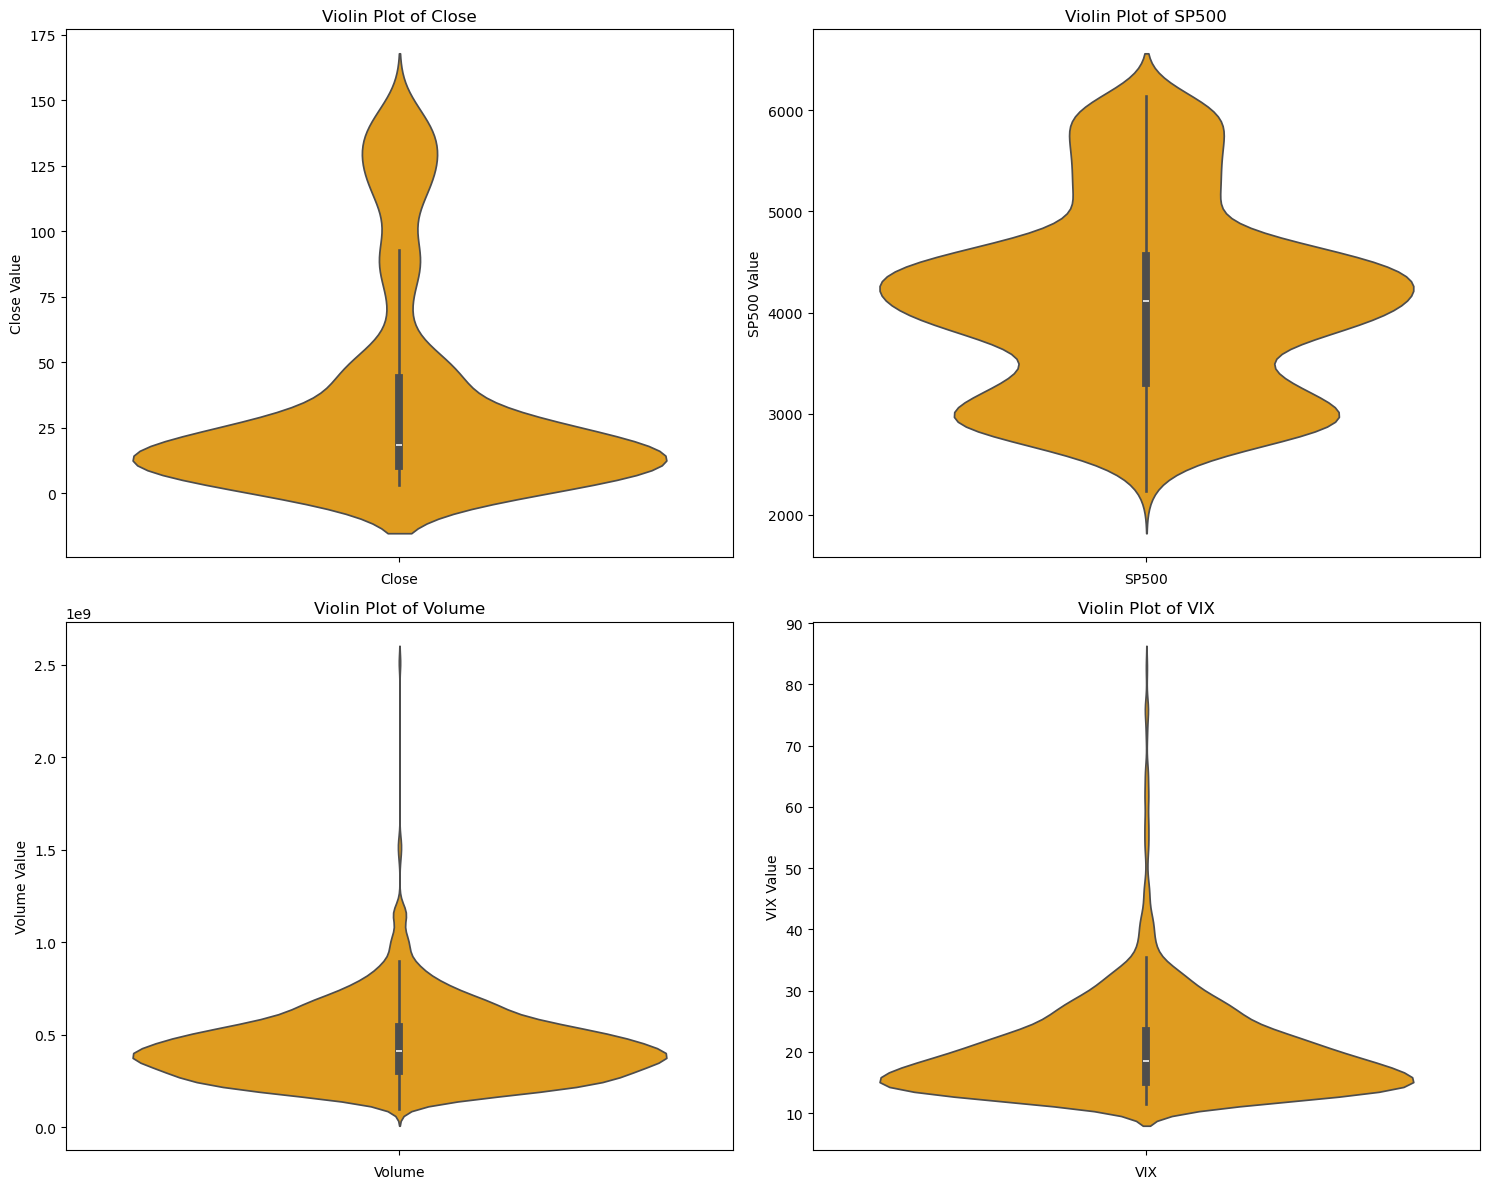

In [ ]:
features = ['Close', 'SP500', 'Volume', 'VIX']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()
for i, f in enumerate(features):
    sns.violinplot(data=df_merged[f], ax=axes[i], color='orange')  # Violin plot for each feature
    axes[i].set_title(f'Violin Plot of {f}')
    axes[i].set_xlabel(f'{f}')
    axes[i].set_ylabel(f'{f} Value')
plt.show()


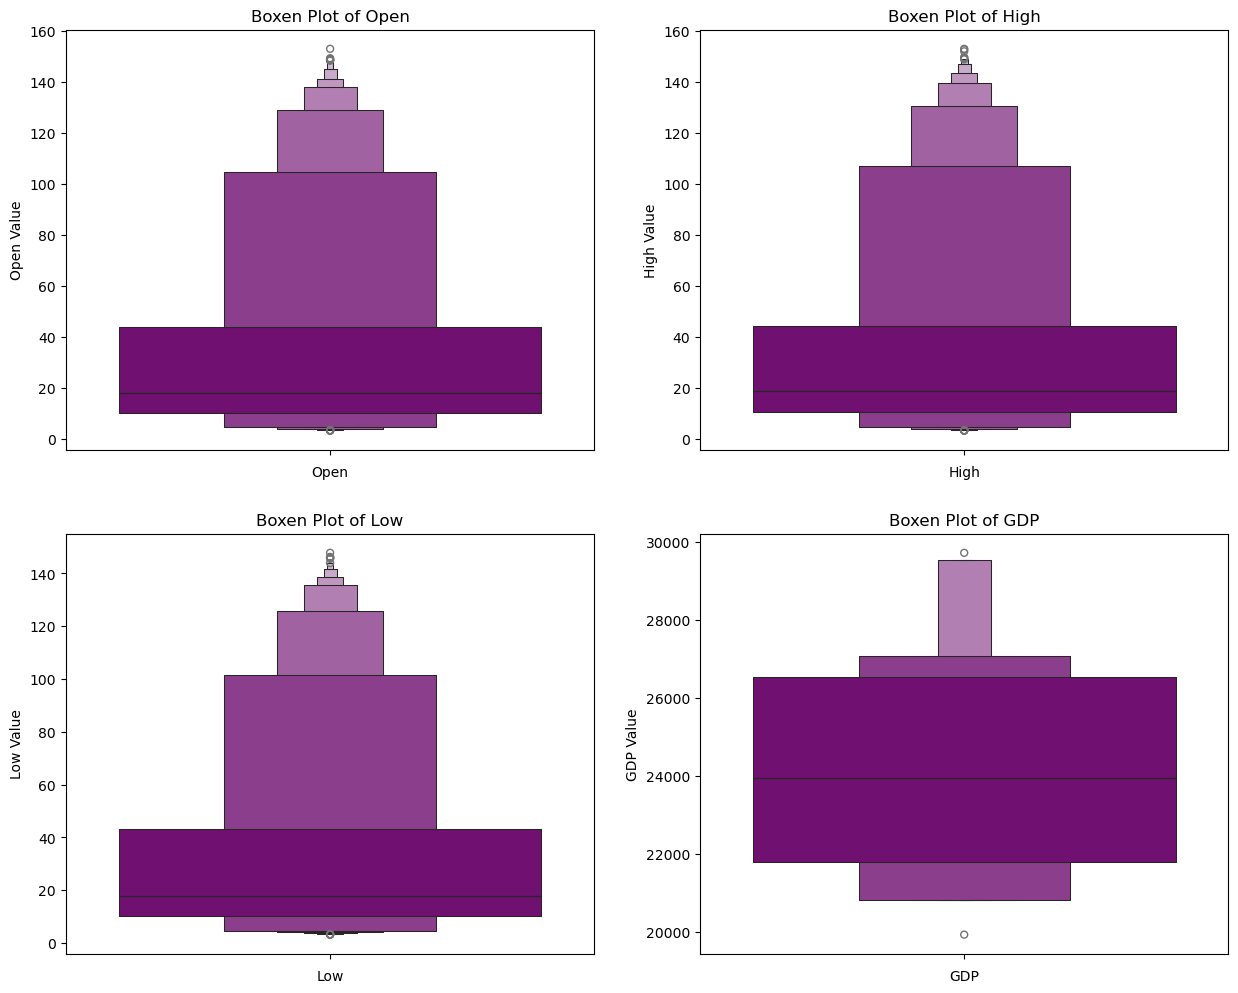

In [45]:
features = ['Open', 'High', 'Low', 'GDP']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, f in enumerate(features):
    sns.boxenplot(data=df_merged[f], ax=axes[i], color='purple')
    axes[i].set_title(f'Boxen Plot of {f}')
    axes[i].set_xlabel(f'{f}')
    axes[i].set_ylabel(f'{f} Value')
    
plt.show()